In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

### An simple example

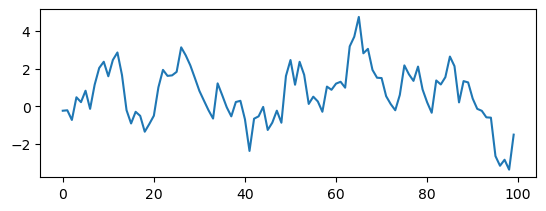

In [2]:
# Data Generation Process
plt.subplot(2, 1, 2)
ar1 = np.array([0.9])
ma1 = np.array([])
AR_object1 = ArmaProcess.from_coeffs(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=100)
plt.plot(simulated_data_1)

In [3]:
# OLS regression
X = sm.add_constant(simulated_data_1[:-1])  # Include lagged value of y as independent variable
y = simulated_data_1[1:]  # Shift y by one position
model = sm.OLS(y, X)
results = model.fit()
print(results.params,results.bse,results.conf_int(alpha=0.05))

[0.12444743 0.79917075] [0.10083426 0.06257289] [[-0.07568066  0.32457552]
 [ 0.67498088  0.92336062]]


### A funtion that generate the data and plot the estimated coeffs

In [4]:
def ar1_results(ar_coeff, n_obs, n_simu):

    ols_slope_coefficients = []
    ols_intercept_coefficients = []

    for _ in range(n_simu): 
        # Generate time series data
        ar = np.array([1, -ar_coeff])
        ma = np.array([1])
        AR_object = ArmaProcess(ar, ma)
        simulated_data = AR_object.generate_sample(nsample=n_obs)

        # Run OLS estimation
        X = sm.add_constant(simulated_data[:-1])  # Include lagged value of y as independent variable
        y = simulated_data[1:]  # Shift y by one position
        model = sm.OLS(y, X)
        results = model.fit()
        
        # Store OLS estimates
        ols_intercept_coefficients.append(results.params[0])
        ols_slope_coefficients.append(results.params[1])
        
    # Plot the distribution of OLS estimates
    plt.hist(ols_intercept_coefficients, bins=30, density=True)
    plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(np.percentile(np.array(ols_intercept_coefficients), 2.5), color='blue', linestyle='--', label='95% CI')
    plt.axvline(np.percentile(np.array(ols_intercept_coefficients), 97.5), color='blue', linestyle='--')
    plt.xlabel('Coefficient')
    plt.ylabel('Density')
    plt.title('Distribution of OLS slope Estimates')
    plt.show()
        
    # Plot the distribution of OLS estimates
    plt.hist(ols_slope_coefficients, bins=30, density=True)
    plt.axvline(ar_coeff, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(np.percentile(np.array(ols_slope_coefficients), 2.5), color='blue', linestyle='--', label='95% CI')
    plt.axvline(np.percentile(np.array(ols_slope_coefficients), 97.5), color='blue', linestyle='--')
    plt.xlabel('Coefficient')
    plt.ylabel('Density')
    plt.title('Distribution of OLS intercept Estimates')
    plt.show()

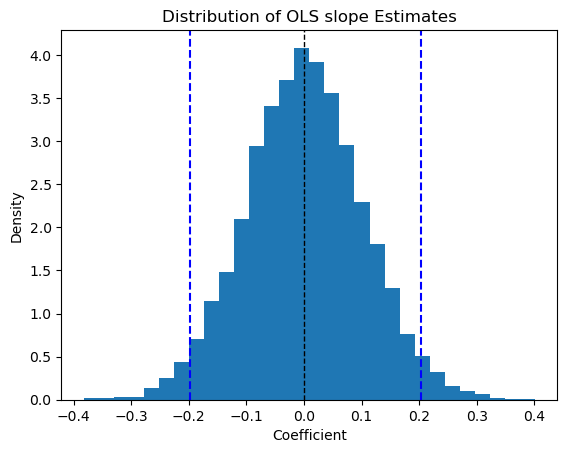

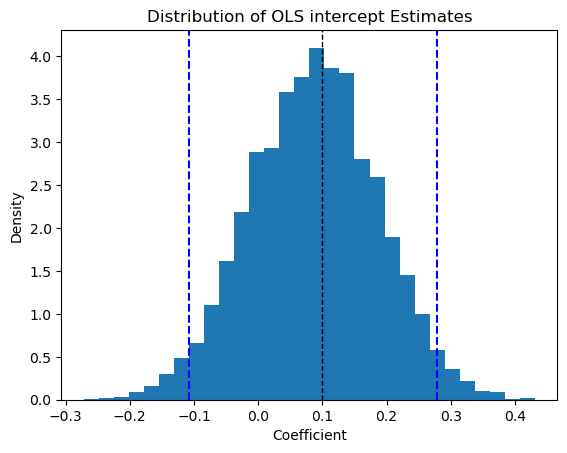

In [5]:
ar1_results(0.1, 100, 10000)

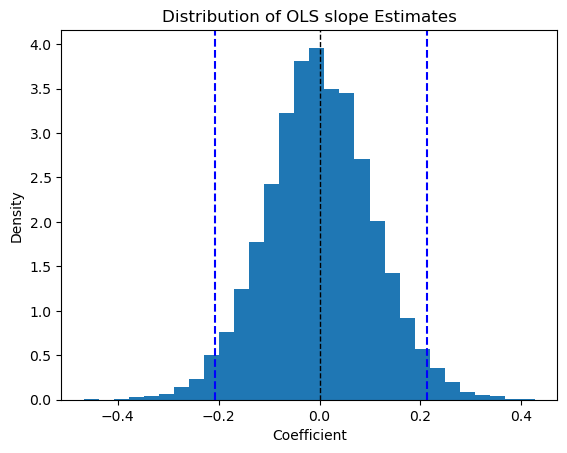

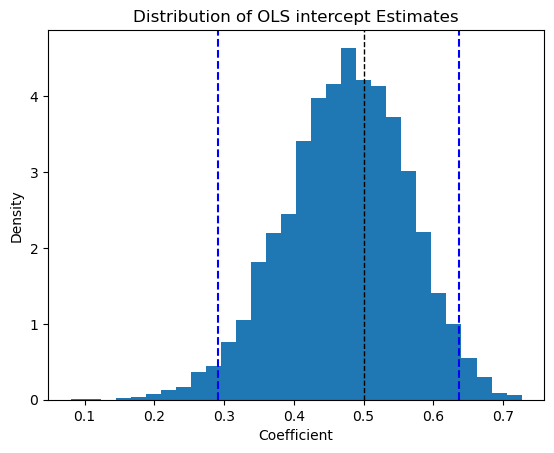

In [6]:
ar1_results(0.5, 100, 10000)

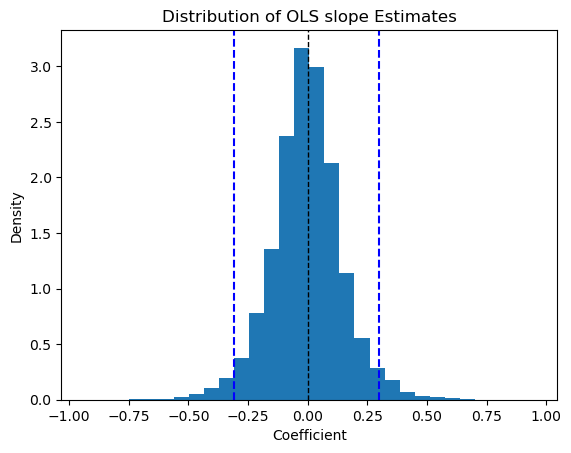

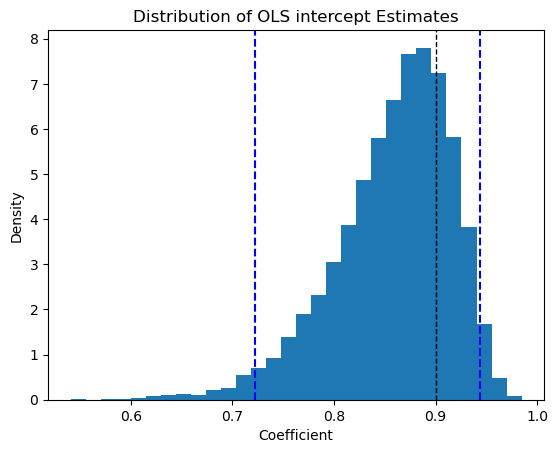

In [7]:
ar1_results(0.9,  100, 10000)

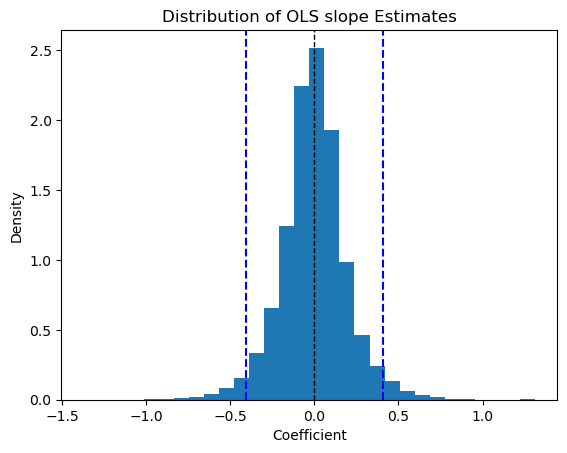

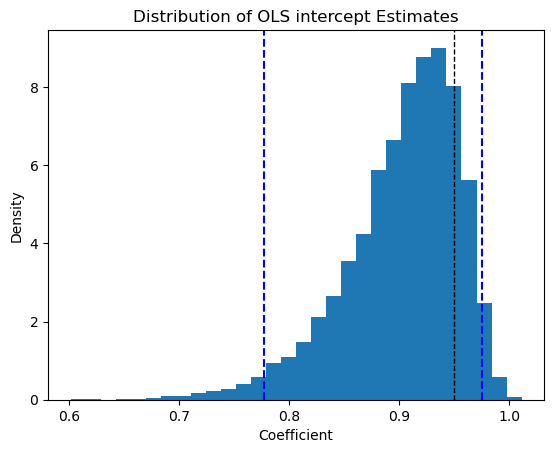

In [8]:
ar1_results(0.95,  100, 10000)

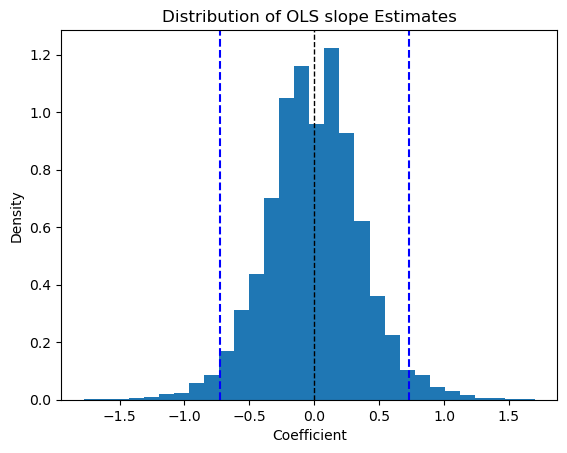

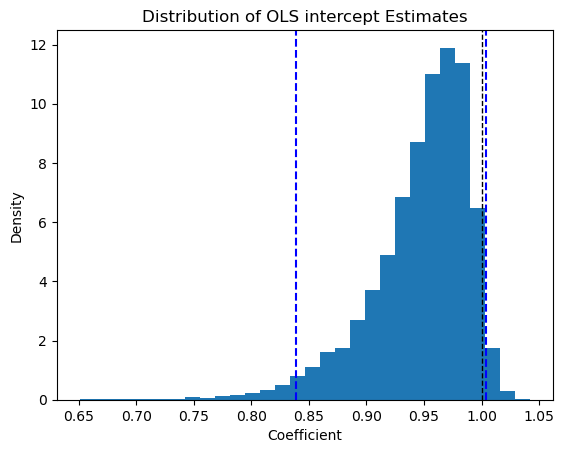

In [14]:
ar1_results(1,  100, 10000)